# DataViz Research Project

## Main Question

(A) How did Covid-19 Pandemic impact unemployment in Ontario?

#Unemployment related questions/tasks 
(S) Data taken from: https://data.ontario.ca/en/dataset/duration-of-unemployment

#####
#by: iamfaiq

# Question 1

What is the difference on average between total unemployment in 2018, 2019 and 2020 in Ontario?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
#(S)
df = pd.read_csv('data.csv')
a = "Mar2018"

def dateConverter(d):
    m = d[0:3] #ignroes the char at idex 3
    #print(m)
    y = d[3:] # starts at index 3
    #print(y)
    #print("-----------")
    if (m=="Mar"):
        a = "01-03-"
    elif (m=="Jun"):
        a = "01-06-"
    elif (m=="Sep"):
        a = "01-09-"
    else:
        #print(m)
        a = "01-12-"
    a = a + y
    return a

df['MONTH'] = df['MONTH'].map(lambda x: dateConverter(x)) # converting the date from MonYear to ##-##-####
#print(df.dtype)
df = df.rename(columns={'MONTH': 'Date', 'Both sexes':'Unisex'})
df['Date'] =  pd.to_datetime(df['Date'], yearfirst=True, format='%d-%m-%Y')#infer_datetime_format=True)

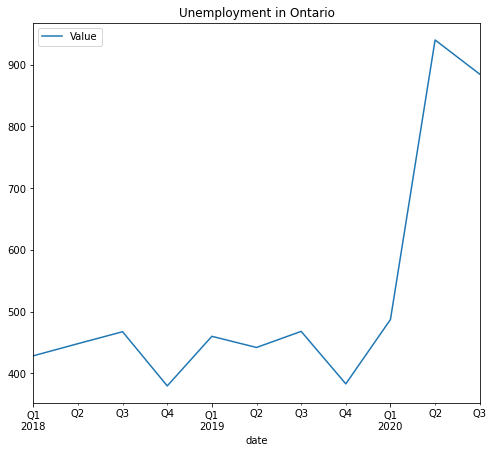

In [5]:
adf = df.copy()
df1 = adf[ (adf.Date >= '2018') & (adf['GEOGRAPHY'] == 'Total, Ontario regions') & (adf['AGE GROUP'] == 'Total, 15 years and over') & (adf['DURATION'] == 'Total unemployed')]

data = {'date': df1['Date'], 'Value': df1['Unisex']}
df2 = pd.DataFrame(data)

df2.set_index("date", inplace = True)


df2.plot(figsize=(8,7),title="Unemployment in Ontario")#, fontsize=12)

#df2

(E) The plot above shows that unemployment rose to nearly twice as much comparing to 2018 and 2019 in 2020 during the Pandemic. Highlighting the significant unemployment during the pandemic comparing to 2018 and 2019.

# Question 2

On average, which region of Ontario was impacted the most due to unemployment in 2020?

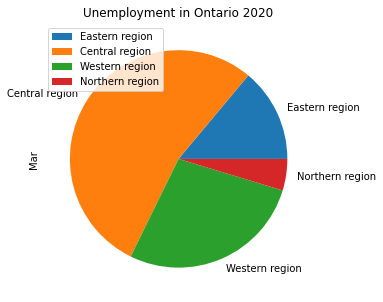

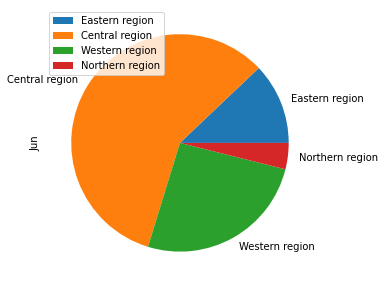

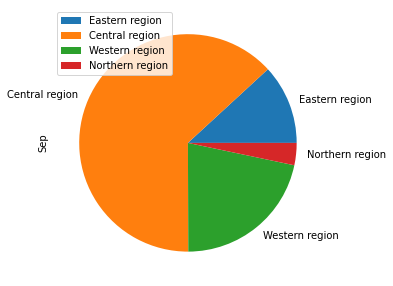

In [194]:
dfq2 = df.copy()
dfq2 = dfq2[ (dfq2.Date >= '2020') & (dfq2['AGE GROUP'] == 'Total, 15 years and over') & (dfq2['DURATION'] == 'Total unemployed')]
#print(dfq2)
tdf = dfq2.copy()

tdf = tdf[tdf['GEOGRAPHY'] != 'Total, Ontario regions']

mon = ['Mar', 'Jun', 'Sep']
tdf['month'] = pd.DatetimeIndex(tdf['Date']).month
tdf['month'] = tdf['month'].apply(lambda x: calendar.month_abbr[x])
tdf.groupby(by=tdf.month)
totalUnisexValues = tdf['Unisex'].tolist()

d = {}
i = 0
for key in mon:
    t = []
    for j in range(i,i+4):
        
        t.append(totalUnisexValues[j])
    d[key] = t
    i += 4

ontRegIndex = tdf['GEOGRAPHY'].head(4).tolist()

#print(d)

q2df = pd.DataFrame(d, index=ontRegIndex)
#plot = q2df.plot.pie(subplots=True, figsize=(11, 6))
mplot = q2df.plot.pie(y='Mar', figsize=(8, 5))
plt.title("Unemployment in Ontario 2020")
jplot = q2df.plot.pie(y='Jun', figsize=(8, 5))
splot = q2df.plot.pie(y='Sep', figsize=(8, 5))


The pie charts above show that in 2020 high unemployment hit Central Ontario the hardest. It consistently accounted for more than half of Ontario’s unemployed force through 2020. In fact, as 2020 progressed, unemployment rose even further in Central Ontario comparing to other regions.

# Question 3

Which age groups were impacted the most by unemployment in the region most impacted (any trend)?:

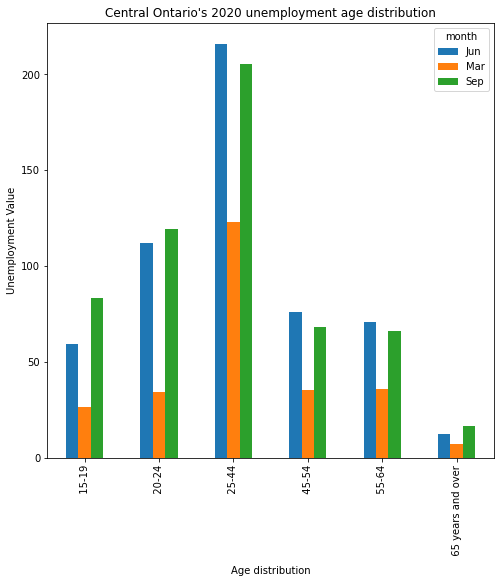

In [195]:
dfq3 = df.copy()
dfq3 = dfq3[(dfq3.Date >= '2020') & (dfq3['GEOGRAPHY'] == 'Central region') & (dfq3['DURATION'] == 'Total unemployed')]

tdf = dfq3.copy()
tdf['month'] = pd.DatetimeIndex(tdf['Date']).month
tdf['month'] = tdf['month'].apply(lambda x: calendar.month_abbr[x]) 
tdf.groupby(by=tdf.month)

tdf = tdf[tdf['AGE GROUP'] != 'Total, 15 years and over'] # to get the specific values that make this value
tdf = tdf[tdf['Unisex'] < 250] #to get only relevant values and filter out irrelevant jargon

#print(tdf)

tdf.pivot(index='AGE GROUP', columns='month', values='Unisex').plot(kind='bar', figsize=(8,8))

plt.xlabel("Age distribution")
plt.ylabel("Unemployment Value")
plt.title("Central Ontario's 2020 unemployment age distribution")
plt.show()
#tdf


(R) The plot above shows that people in the age range of 25-44 years old were impacted the most by unemployment in Central Ontario in 2020. And by September 2020’s reporting, unemployment rose in Central Ontario in 15-24 years old age groups, and 65 years old or above age group; decreased slightly in 25-64 years old age groups.

(T) In short, during the 2020 pandemic unemployment in Ontario more than doubled. The highest increase in unemployment in Ontario was seen in Central Ontario throughout (until Sep 2020’s reporting). More specifically, the age group impacted the most in Central Ontario by unemployment was of 25-44 years old. Finally by the last figures of data reported, unemployment has slightly dropped overall and in Central Ontario's 25-64 years old age groups however it is on rise in every other age group in this region.